# Preprocessing and Normalization

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import data
data1 = pd.read_csv('Amazon Customer Behavior Survey.csv')

## Prepocessing

In [89]:
# Remove missing values
data = data1.dropna()

initial_row_count = len(data)

# Deleting rows where 'Age' is less than 18
deleted_rows = data[data['age'] < 18]
data = data[data['age'] >= 18]

## Normalization - Converting data into numerical values

### Cart_abandonment_factors

In [90]:

# Function to map cart_abandonment_factors to a numeric value
def map_cart_abandonment_factors(freq):
    mapping = {
        "others": 4,
        "Changed my mind or no longer need the item'": 3,
        "High shipping costs": 2,
        "Found a better price elsewhere'": 1
    }
    return mapping.get(freq, 0)

data['Cart_Abandonment_Factors_Num'] = data['Cart_Abandonment_Factors'].apply(map_cart_abandonment_factors)

# Normalize the new column
scaler = MinMaxScaler()
data['Cart_Abandonment_Factors_Num'] = scaler.fit_transform(data[['Cart_Abandonment_Factors_Num']])

### Purchase_Categories

In [91]:
# Split 'Purchase_Categories' into binary columns for each category
category_columns = data['Purchase_Categories'].str.get_dummies(sep=';')

# Define the mapping function
def map_category(category):
    mapping = {
        "Groceries and Gourmet Food": 5,
        "Home and Kitchen": 4,
        "Clothing and Fashion": 3,
        "Beauty and Personal Care": 2,
        "others": 1
    }
    return mapping.get(category, 0)

for column in category_columns.columns:
    category_columns[column] = category_columns[column].apply(map_category)


### Recommendation_Helpfulness

In [92]:
# Function to map purchase frequency to a numeric value
def map_recommendation_helpfulness(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)

data['Recommendation_Helpfulness_Num'] = data['Recommendation_Helpfulness'].apply(map_recommendation_helpfulness)

# Normalize the new column
scaler = MinMaxScaler()
data['Recommendation_Helpfulness_Num'] = scaler.fit_transform(data[['Recommendation_Helpfulness_Num']])

### Review_Reliability

In [93]:
data['Review_Reliability'].unique()

# Function to map purchase frequency to a numeric value
def map_review_reliability(freq):
    mapping = {
        "Heavily": 5,
        "Moderately": 4,
        "Occasionally": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)

data['Review_Reliability_Num'] = data['Review_Reliability'].apply(map_review_reliability)

# Normalize the new column
scaler = MinMaxScaler()
data['Review_Reliability_Num'] = scaler.fit_transform(data[['Review_Reliability_Num']])

### Purchase_frequency

In [94]:
# Normalize purchase_frequency

# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)

data['Purchase_Frequency_Num'] = data['Purchase_Frequency'].apply(map_purchase_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Purchase_Frequency_Num'] = scaler.fit_transform(data[['Purchase_Frequency_Num']])

### Browsing_Frequency

In [95]:
def map_browsing_Frequency(freq):
    mapping = {
        "Multiple times a day": 4,
        "Few times a week": 3,
        "Few times a month": 2,
        "Rarely": 1
    }
    return mapping.get(freq, 0)

data['Browsing_Frequency_Num'] = data['Browsing_Frequency'].apply(map_browsing_Frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Browsing_Frequency_Num'] = scaler.fit_transform(data[['Browsing_Frequency_Num']])

### Personalized_Recommendation_Frequency

In [96]:
# Function to map purchase frequency to a numeric value
def map_personalized_recommendation_frequency(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)

data['Personalized_Recommendation_Frequency_Num'] = data['Personalized_Recommendation_Frequency'].apply(map_personalized_recommendation_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Personalized_Recommendation_Frequency_Num'] = scaler.fit_transform(data[['Personalized_Recommendation_Frequency_Num']])

### Cart_Completion_Frequency

In [97]:
def map_cart_completion_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)

data['Cart_Completion_Frequency_Num'] = data['Cart_Completion_Frequency'].apply(map_cart_completion_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Cart_Completion_Frequency_Num'] = scaler.fit_transform(data[['Cart_Completion_Frequency_Num']])

### Saveforlater_Frequency

In [98]:
def map_saveforlater_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)

data['Saveforlater_Frequency_Num'] = data['Saveforlater_Frequency'].apply(map_saveforlater_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Saveforlater_Frequency_Num'] = scaler.fit_transform(data[['Saveforlater_Frequency_Num']])

##  Descriptive statistics & visualization of data exploration

### Correlation between columns

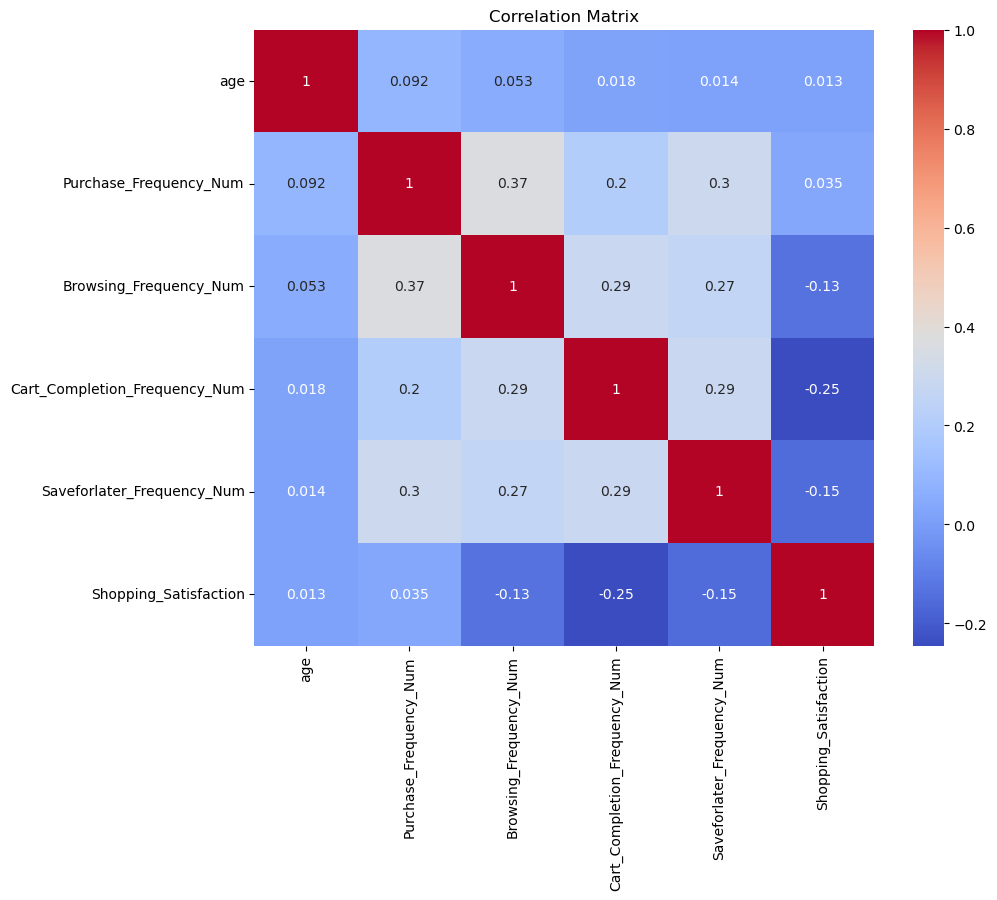

In [99]:
# Selecting relevant columns for correlation.
selected_columns = ['age', 'Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Shopping_Satisfaction']  # add your selected columns

# Create the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation between Browsing_Frequency, Purchase_Frequency and Recommendation_Helpfulness

In [100]:
high_browsing_threshold = 0.5
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]
low_browsing_freq = data[data['Browsing_Frequency_Num'] <= high_browsing_threshold]

high_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] > high_browsing_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] <= high_browsing_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): {mean_purchase_high_recommend}")
print(f"Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): {mean_purchase_low_recommend}")


Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): 0.5327380952380952
Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): 0.528969957081545


In [101]:
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]

high_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] > high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]
low_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] <= high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]

high_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] > high_rec_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] <= high_rec_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend_high_rec = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend_high_rec = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): {mean_purchase_high_recommend_high_rec}")
print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): {mean_purchase_low_recommend_high_rec}")


Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): 0.5540540540540541
Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): 0.5590909090909091


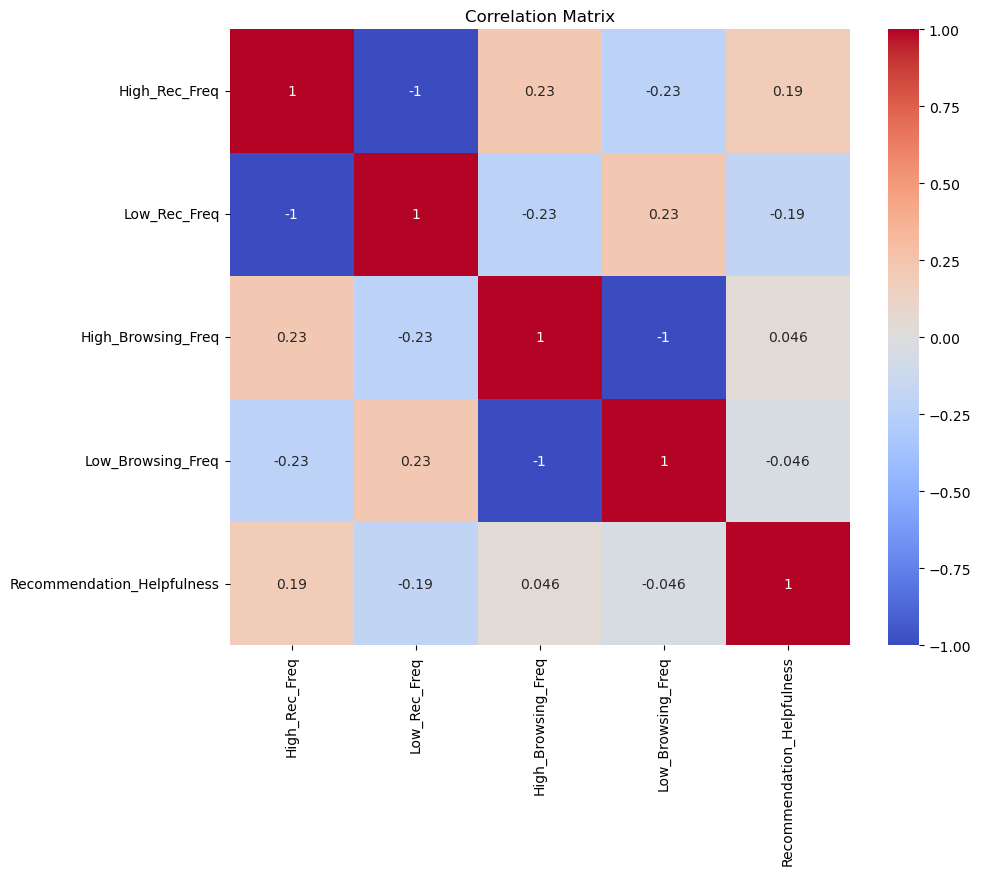

In [102]:
correlation_data = pd.DataFrame()

correlation_data['High_Rec_Freq'] = data['Personalized_Recommendation_Frequency_Num'].apply(lambda x: 1 if x > data['Personalized_Recommendation_Frequency_Num'].median() else 0)
correlation_data['Low_Rec_Freq'] = 1 - correlation_data['High_Rec_Freq']
correlation_data['High_Browsing_Freq'] = data['Browsing_Frequency_Num'].apply(lambda x: 1 if x > high_browsing_threshold else 0)
correlation_data['Low_Browsing_Freq'] = 1 - correlation_data['High_Browsing_Freq']
correlation_data['Recommendation_Helpfulness'] = data['Recommendation_Helpfulness_Num']

corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### How are age and gender correlated for Purchase_category?

In [103]:
# Gender groups
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Age groups
bins = [20, 30, 40, 50, 60, 70] 
labels = ['18-30', '30-40', '40-50', '50-60', '60-70']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

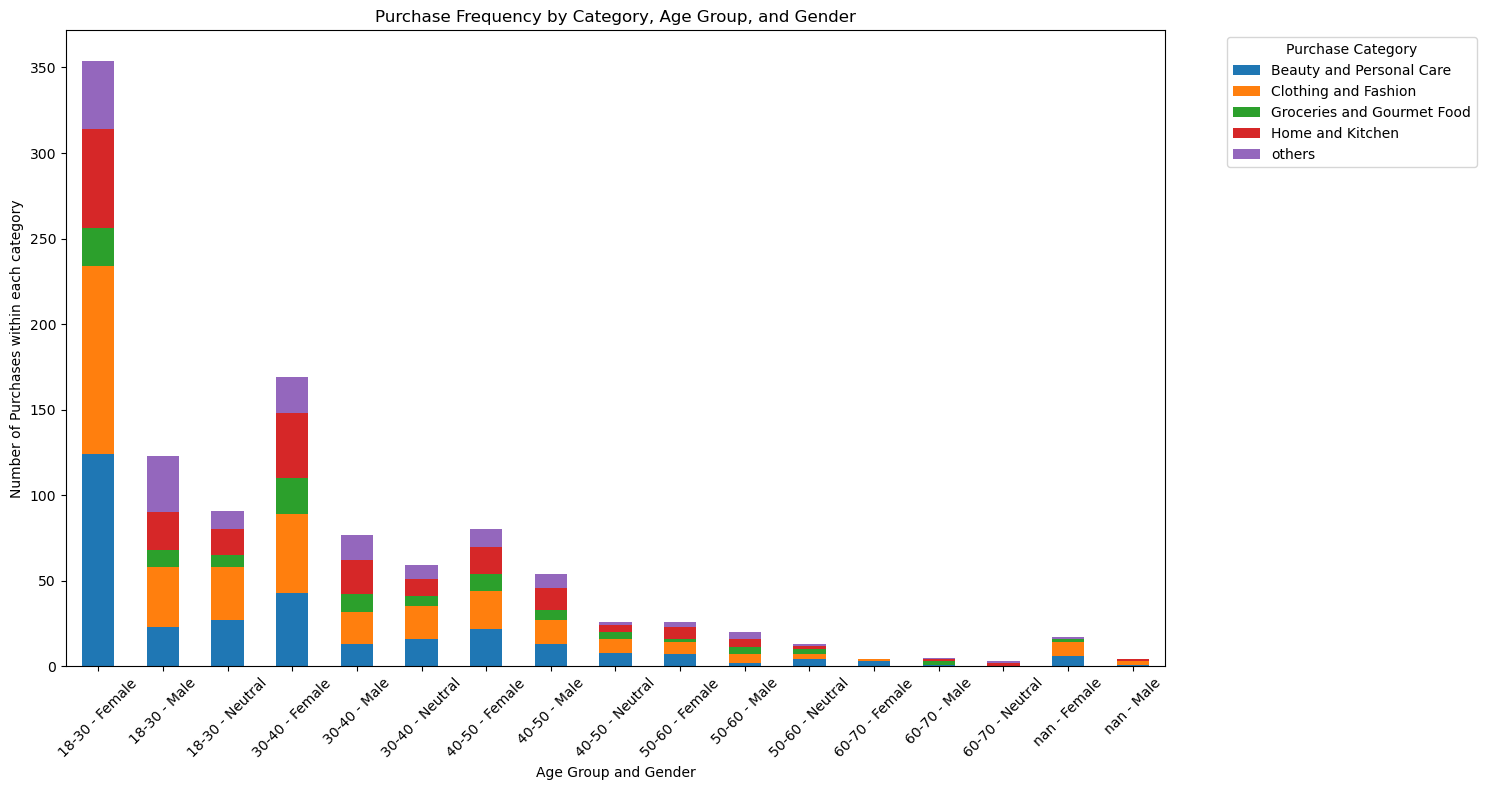

In [104]:
# Split 'Purchase_Categories' into individual entries
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Convert 'Age_Group' and 'Gender' to strings
data_split['Age_Group'] = data_split['Age_Group'].astype(str)
data_split['Gender'] = data_split['Gender'].astype(str)

# New column that combines 'Age_Group' and 'Gender'
data_split['Age_Gender'] = data_split['Age_Group'] + " - " + data_split['Gender']

# Group by 'Age_Gender' and 'Split_Category' and count occurrences
category_age_gender_count = data_split.groupby(['Age_Gender', 'Split_Category']).size().reset_index(name='Count')

category_pivot = category_age_gender_count.pivot(index='Age_Gender', columns='Split_Category', values='Count').fillna(0)

plt.figure(figsize=(15, 8))
category_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Age Group and Gender')
plt.ylabel('Number of Purchases within each category')
plt.title('Purchase Frequency by Category, Age Group, and Gender')
plt.legend(title='Purchase Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Applying same approach, but now with the Purchase_Frequency

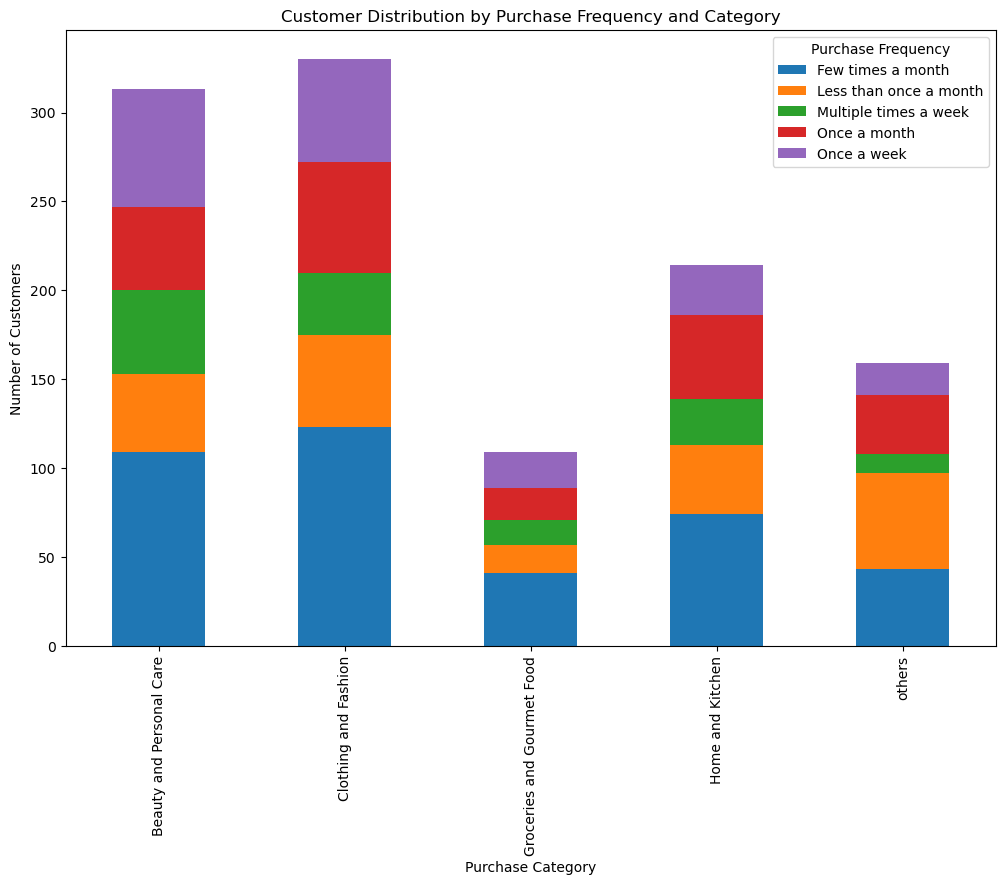

In [105]:
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

category_freq_count = data_split.groupby(['Split_Category', 'Purchase_Frequency']).size().unstack(fill_value=0)

category_freq_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Purchase Category')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Purchase Frequency and Category')
plt.legend(title='Purchase Frequency')
plt.show()

### Can we visualize differently for a another perspective?

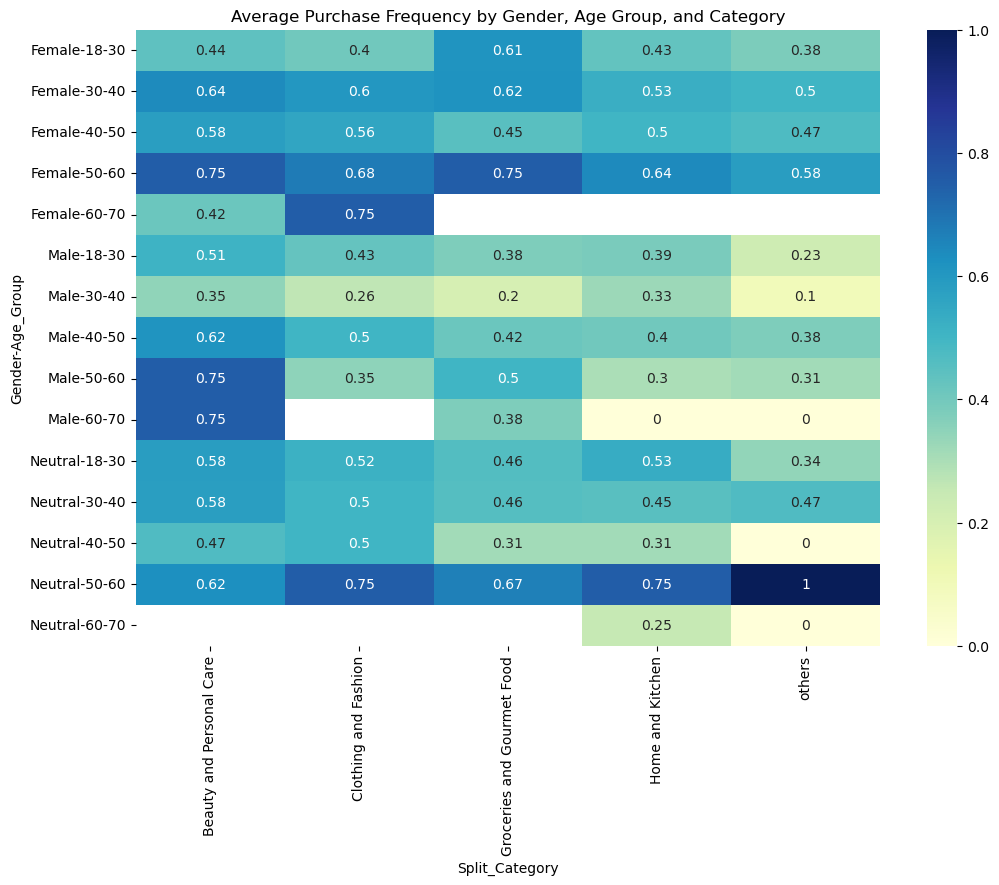

In [106]:
data_split = data.join(split_categories) 

grouped_data = data_split.groupby(['Gender', 'Age_Group', 'Split_Category'])['Purchase_Frequency_Num'].mean()

grouped_df = grouped_data.reset_index()

# Ppivot table for heatmap
pivot_table = grouped_df.pivot_table(index=['Gender', 'Age_Group'], columns='Split_Category', values='Purchase_Frequency_Num')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender, Age Group, and Category')
plt.show()

### Maybe we can generalize a bit more to get a simpler result

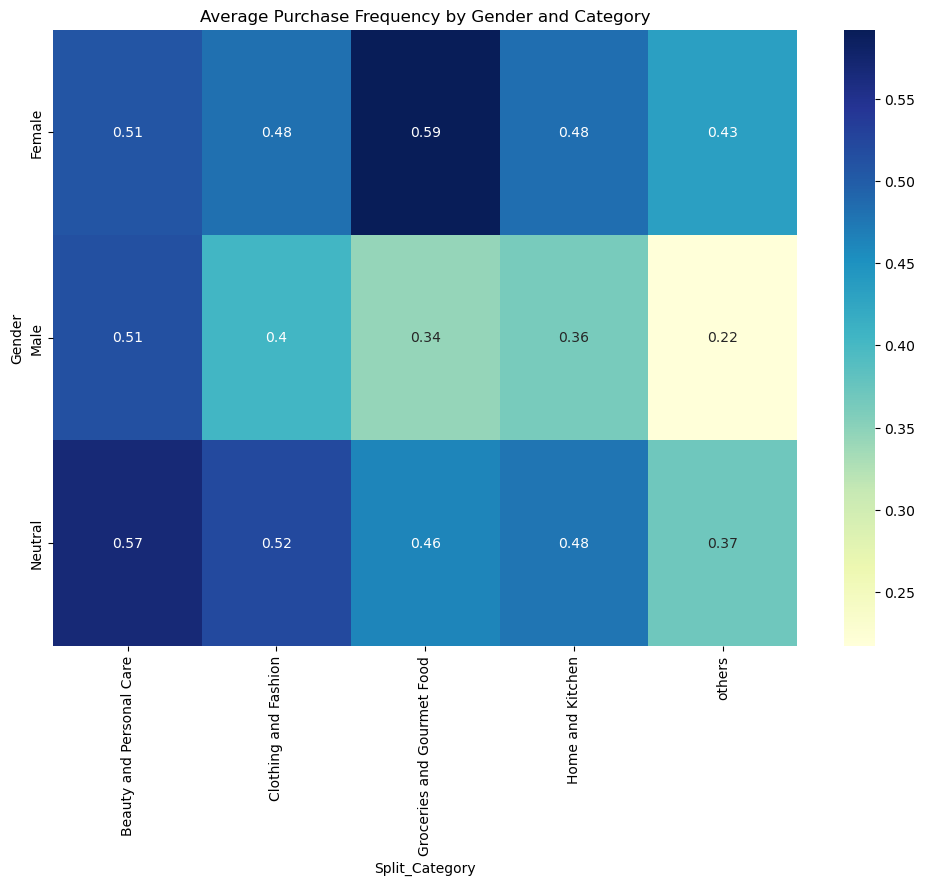

In [107]:
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

grouped_data = data_split.groupby(['Gender', 'Split_Category'])['Purchase_Frequency_Num'].mean()

grouped_df = grouped_data.reset_index()

pivot_table = grouped_df.pivot_table(index='Gender', columns='Split_Category', values='Purchase_Frequency_Num')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender and Category')
plt.show()

## Segmentation

c:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


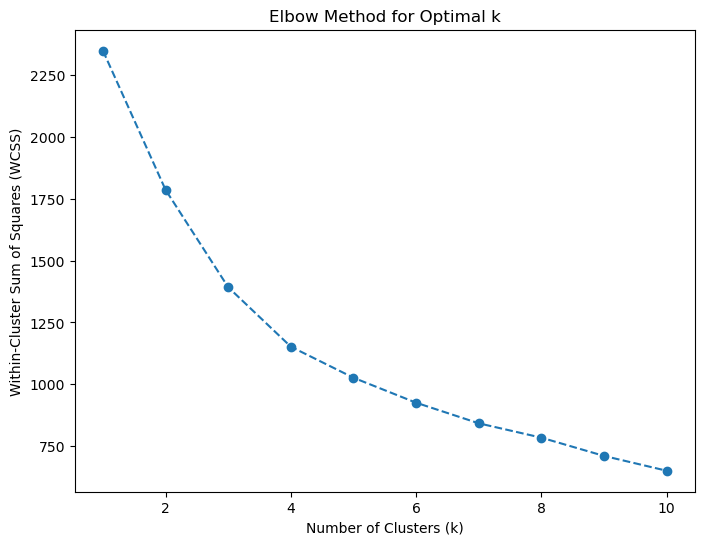

         Purchase_Frequency_Num  Browsing_Frequency_Num  \
Cluster                                                   
0                      0.580263                0.671930   
1                      0.595430                0.593190   
2                      0.350649                0.385281   
3                      0.104478                0.251244   

         Cart_Abandonment_Factors_Num  Shopping_Satisfaction  
Cluster                                                       
0                            0.026316               1.578947  
1                            0.018817               3.317204  
2                            0.720779               3.000000  
3                            0.033582               2.201493  


In [108]:
# Select the relevant columns for clustering
selected_columns = ['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Abandonment_Factors_Num', 'Shopping_Satisfaction']
X = data[selected_columns]

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

data['Cluster'] = cluster_labels

cluster_means = data.groupby('Cluster')[selected_columns].mean()
print(cluster_means)


In [109]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'The average silhouette score for k={chosen_k} is: {silhouette_avg}')

The average silhouette score for k=4 is: 0.26450329244841836


# Decision Tree

In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from random import choice
from sklearn.preprocessing import LabelEncoder

In [111]:
print("Loading the dataset...")
df1 = pd.read_csv('Amazon Customer Behavior Survey.csv')
# Remove missing values
df = df1.dropna()

# Deleting rows where 'Age' is less than 18
deleted_rows = df[df['age'] < 18]
df = df[df['age'] >= 18]
print("Dataset loaded successfully.")

Loading the dataset...
Dataset loaded successfully.


In [112]:
# Create a mask for NaN values
nan_mask = df.isna()

# Filter the DataFrame to show only rows with NaN values
nan_rows = df[nan_mask.any(axis=1)]

print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
Empty DataFrame
Columns: [Timestamp, age, Gender, Purchase_Frequency, Purchase_Categories, Personalized_Recommendation_Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency , Recommendation_Helpfulness, Rating_Accuracy , Shopping_Satisfaction, Service_Appreciation, Improvement_Areas]
Index: []

[0 rows x 23 columns]


In [113]:
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")

df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")

Encoding categorical variables...
Categorical variables encoded.


In [114]:
# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)

# Apply the mapping to the dataframe
df['Purchase_Frequency_Num'] = df['Purchase_Frequency'].apply(map_purchase_frequency)
print("Separating features and target variable...")
X = df[['age', 'Gender']]
y = df['Purchase_Categories']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Creating a decision tree classifier
print("Creating a decision tree classifier...")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("Decision tree classifier created and fitted.")

# Tuning
print("Defining parameters to tune...")
param_grid = {
    'max_depth': [15, 16, 17, 18],
    'min_samples_split': [15, 16, 17],
    'min_samples_leaf': [14, 15, 16]
}
print("Parameters defined.")

# Using GridSearchCV to find the best parameters
print("Finding the best parameters using GridSearchCV...")
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

# Getting the best parameters and fitting the model
print("Getting the best parameters and fitting the model...")
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = best_dt_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")

Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Creating a decision tree classifier...
Decision tree classifier created and fitted.
Defining parameters to tune...
Parameters defined.
Finding the best parameters using GridSearchCV...


c:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found using GridSearchCV.
Getting the best parameters and fitting the model...
Model fitted with the best parameters.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the tuned decision tree classifier: 24.74%


In [115]:
# Separating features and target variable
print("Separating features and target variable...")
X = df[['age','Gender']]
y = df['Purchase_Categories']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Creating a decision tree classifier
print("Creating a decision tree classifier...")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("Decision tree classifier created and fitted.")

# Tuning
print("Defining parameters to tune...")
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
print("Parameters defined.")

# Using GridSearchCV to find the best parameters
print("Finding the best parameters using GridSearchCV...")
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

# Getting the best parameters and fitting the model
print("Getting the best parameters and fitting the model...")
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = best_dt_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")

Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Creating a decision tree classifier...
Decision tree classifier created and fitted.
Defining parameters to tune...
Parameters defined.
Finding the best parameters using GridSearchCV...


c:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found using GridSearchCV.
Getting the best parameters and fitting the model...
Model fitted with the best parameters.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the tuned decision tree classifier: 22.68%


In [ ]:
# Input age and gender
age = int(input("Enter age: "))
gender = input("Enter gender (M/F): ")

gender = 0 if gender.upper() == 'M' else 1

predicted_category = best_dt_classifier.predict([[age, gender]])

print(f"Based on the input, the predicted purchase category is: {predicted_category[0]}")

In [ ]:
# Drop rows where 'Gender' is 'Others' or 'Prefer not to say'
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

# Encoding categorical variables using LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Purchase_Categories'] = le.fit_transform(df['Purchase_Categories'])

# Separating features and target variable
X = df[['age', 'Gender', 'Purchase_Categories']]
y = df['Purchase_Frequency']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()

# Fit the classifier with training data
dt_classifier.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")

# Run 5 tests with random age, gender, and purchase category inputs
for test_number in range(5):
    age = 20 + test_number * 5
    
    gender = choice([0, 1])
    
    purchase_category = choice(df['Purchase_Categories'].unique())
    
    # Predict purchase frequency using the trained Decision Tree Classifier
    predicted_purchase_frequency = dt_classifier.predict([[age, gender, purchase_category]])

    print(f"Test {test_number + 1}: Input - Age: {age}, Gender (Encoded): {gender}, Purchase Category: {le.inverse_transform([purchase_category])[0]}, Predicted Purchase Frequency: {predicted_purchase_frequency[0]}")


Accuracy of the tuned decision tree classifier: 0.00%
Test 1: Input - Age: 20, Gender (Encoded): 1, Purchase Category: Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others, Predicted Purchase Frequency: Multiple times a week
Test 2: Input - Age: 25, Gender (Encoded): 1, Purchase Category: Groceries and Gourmet Food;Clothing and Fashion;others, Predicted Purchase Frequency: Few times a month
Test 3: Input - Age: 30, Gender (Encoded): 0, Purchase Category: Beauty and Personal Care;others, Predicted Purchase Frequency: Once a week
Test 4: Input - Age: 35, Gender (Encoded): 0, Purchase Category: Beauty and Personal Care;Clothing and Fashion;others, Predicted Purchase Frequency: Once a week
Test 5: Input - Age: 40, Gender (Encoded): 0, Purchase Category: Home and Kitchen;others, Predicted Purchase Frequency: Less than once a month


c:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# RandomForrest

In [117]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")

# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Prefer not to say': 2, 'Others': 3})
print("Categorical variables encoded.")

# Separating features and target variable
print("Separating features and target variable...")
X = df[['age', 'Gender']]
y = df['Purchase_Categories']
print("Features and target variable separated.")

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Creating a RandomForestClassifier
print("Creating a Random Forest classifier...")
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print("Random Forest classifier created and fitted.")

# Predicting on the test set
print("Predicting on the test set...")
y_pred = rf_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest classifier: {accuracy * 100:.2f}%")



Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
Encoding categorical variables...
Categorical variables encoded.
Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Creating a Random Forest classifier...
Random Forest classifier created and fitted.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the Random Forest classifier: 23.23%


In [119]:
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")

# Perform one-hot encoding for Purchase_Categories
print("Performing one-hot encoding for Purchase_Categories...")
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

# Separating features and target variable
print("Separating features and target variable...")
X = df[['age', 'Gender'] + list(categories.columns)]
y = df['Purchase_Frequency']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
print("Splitting the dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Defining parameters to tune
print("Defining parameters to tune...")
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("Parameters defined.")

# Creating a decision tree classifier
print("Creating a decision tree classifier...")
dt_classifier = DecisionTreeClassifier()

# Using GridSearchCV to find the best parameters
print("Finding the best parameters using GridSearchCV...")
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

# Getting the best parameters and fitting the model
print("Getting the best parameters and fitting the model...")
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

print("Predicting on the test set...")
y_pred = best_dt_classifier.predict(X_test)
print("Prediction completed.")

# Calculating accuracy
print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned decision tree classifier: {accuracy * 100:.2f}%")


Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
Performing one-hot encoding for Purchase_Categories...
One-hot encoding completed for Purchase_Categories.
Separating features and target variable...
Features and target variable separated.
Splitting the dataset into train and test sets...
Dataset split completed.
Defining parameters to tune...
Parameters defined.
Creating a decision tree classifier...
Finding the best parameters using GridSearchCV...
Best parameters found using GridSearchCV.
Getting the best parameters and fitting the model...
Model fitted with the best parameters.
Predicting on the test set...
Prediction completed.
Calculating accuracy...
Accuracy of the tuned decision tree classifier: 32.32%


In [120]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

X = df[['age', 'Gender'] + list(categories.columns)]
y = df['Purchase_Frequency']
print("Features and target variable separated.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

param_grid = {
    'max_depth': [20, 40, 70],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 40]
}
print("Parameters defined.")

gb_classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters found using GridSearchCV.")

best_params = grid_search.best_params_
best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train, y_train)
print("Model fitted with the best parameters.")

print("Predicting on the test set...")
y_pred = best_gb_classifier.predict(X_test)


print("Calculating accuracy...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned Gradient Boosting classifier: {accuracy * 100:.2f}%")


Dataset loaded successfully.
Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
One-hot encoding completed for Purchase_Categories.
Features and target variable separated.
Dataset split completed.
Parameters defined.
Best parameters found using GridSearchCV.
Model fitted with the best parameters.
Predicting on the test set...
Calculating accuracy...
Accuracy of the tuned Gradient Boosting classifier: 42.42%


In [121]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
print("Loading the dataset...")
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
print("Dataset loaded successfully.")
# Encoding categorical variables (convert Gender to numerical)
print("Encoding categorical variables...")
# Disregard 'Prefer not to say' and 'others' from the gender row
df = df[(df['Gender'] != 'Others') & (df['Gender'] != 'Prefer not to say')]

gender_mapping = {'Male': 0, 'Female': 1}

# Mapping the genders in the 'Gender' column using the provided mapping
df['Gender'] = df['Gender'].map(gender_mapping)
print("Categorical variables encoded.")
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

# Perform one-hot encoding for Purchase_Categories
categories = df['Purchase_Categories'].str.get_dummies(';')
df = pd.concat([df, categories], axis=1)
print("One-hot encoding completed for Purchase_Categories.")

# Separating features and target variable
X = df[['age', 'Gender'] + list(categories.columns)]
y = df['Purchase_Frequency']
print("Features and target variable separated.")

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split completed.")

# Defining parameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [20, 40, 70]
}
print("Parameters defined for Random Forest.")

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
print("Best parameters found using GridSearchCV for Random Forest.")

best_params_rf = grid_search_rf.best_params_
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)
print("Random Forest model fitted with the best parameters.")

# Predicting using Random Forest
y_pred_rf = best_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the tuned Random Forest classifier: {accuracy_rf * 100:.2f}%")

Dataset loaded successfully.
Loading the dataset...
Dataset loaded successfully.
Encoding categorical variables...
Categorical variables encoded.
One-hot encoding completed for Purchase_Categories.
One-hot encoding completed for Purchase_Categories.
Features and target variable separated.
Dataset split completed.
Parameters defined for Random Forest.
Best parameters found using GridSearchCV for Random Forest.
Random Forest model fitted with the best parameters.
Accuracy of the tuned Random Forest classifier: 43.43%


# Support Vector Machines (SVM)

In [122]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

In [123]:
# load data
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
df.drop('Timestamp', axis=1, inplace=True)

In [124]:
# Initialize instances from imported classes. These are prepocessing tools to encode labels and scale features
le = LabelEncoder()
scaler = MinMaxScaler()

In [125]:
# Data Preprocessing
age_bin = [20, 30, 40, 50, 60, 70, float('inf')]
age_label = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Groups'] = pd.cut(df['age'], bins=age_bin, labels=age_label, right=False)

In [126]:
# Convert all dtypes to int
cols=["age","Gender","Purchase_Categories","Purchase_Frequency",
     "Personalized_Recommendation_Frequency","Recommendation_Helpfulness",
     "Browsing_Frequency","Product_Search_Method","Search_Result_Exploration",
     "Add_to_Cart_Browsing","Cart_Completion_Frequency",
     "Cart_Abandonment_Factors","Saveforlater_Frequency",
     "Review_Left","Review_Reliability","Review_Helpfulness",
     "Service_Appreciation","Improvement_Areas",'Age_Groups']

for c in cols:
  df[c]=le.fit_transform(df[c])

## Specify Target and Feature Column for SVM analysis

In [127]:
# Selecting target and feature columns for SVM analysis
target = df['Recommendation_Helpfulness']

featureslst=df.drop(['age', 'Gender','Purchase_Frequency',
              'Purchase_Categories', 'Browsing_Frequency','Product_Search_Method',
              'Customer_Reviews_Importance','Cart_Abandonment_Factors',
              'Saveforlater_Frequency','Recommendation_Helpfulness',
              "Service_Appreciation","Improvement_Areas"],axis=1)


In [128]:
# Split test and train data with the classic Hitchhiker reference 
X_train,X_test,y_train,y_test=train_test_split(featureslst,target,test_size=0.2,random_state=42)

In [129]:
# Initialize support vector with optimal parameters
clf_sv=SVC(C=1, 
        kernel= 'linear')

# Fit the SVC classifier on the training sets
clf_sv.fit(X_train,y_train)

# Classifier predictions on the test data
clf_svPred=clf_sv.predict(X_test)
print(clf_svPred)

[2 1 1 2 1 1 1 1 1 1 1 0 2 1 0 1 2 2 1 1 0 1 2 1 1 1 2 2 0 1 1 2 1 2 0 1 2
 0 1 0 1 1 2 1 1 2 1 2 1 1 0 0 1 2 1 1 2 0 1 1 1 0 2 2 1 2 1 1 1 1 0 1 1 1
 1 0 1 2 1 1 0 2 2 2 1 2 0 2 1 1 1 1 2 0 1 2 2 1 2 1 2 1 2 1 1 1 0 0 0 1 0
 1 1 1 1 1 2 1 1 0 0]


In [130]:
# Accuracy, precision
print(classification_report(y_test, clf_svPred))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49        27
           1       0.64      0.75      0.69        57
           2       0.53      0.46      0.49        37

    accuracy                           0.60       121
   macro avg       0.57      0.55      0.56       121
weighted avg       0.59      0.60      0.59       121



In [131]:
# Predict purchase category
prediction = clf_sv.predict([[1, 0, 3, 1, 0, 0, 4, 0, 3, 0, 1]])

# Display input and predicted output
print(list(le.inverse_transform(prediction)))

['40-49']


## KNN comparisons

In [134]:
#KNN
clf_knn=KNeighborsClassifier()
clf_knn.fit(X_train,y_train)
clf_knnpred=clf_knn.predict(X_test)
print(clf_knn)

KNeighborsClassifier()


In [135]:
# Define hyperparameters for K-Nearest Neighbors
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initializing K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fitting GridSearchCV with the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [136]:
print(classification_report(y_test, clf_knnpred))

              precision    recall  f1-score   support

           0       0.37      0.48      0.42        27
           1       0.52      0.65      0.58        57
           2       0.60      0.24      0.35        37

    accuracy                           0.49       121
   macro avg       0.50      0.46      0.45       121
weighted avg       0.51      0.49      0.47       121



In [137]:
print(y_test)

110    2
419    2
567    1
77     1
181    1
      ..
340    1
148    0
495    2
439    1
145    0
Name: Recommendation_Helpfulness, Length: 121, dtype: int32
